In [2]:
import pandas as pd

In [3]:
data_df = pd.read_csv('./source/Dataset/cardio_data.csv')

In [4]:
data_df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


In [5]:
len(data_df)

70000

In [6]:
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB
None


Correcting the data type

In [12]:
data_df['date'] = pd.to_datetime(data_df['date'], format="%d-%m-%Y")
data_df.dtypes

date           datetime64[ns]
country                object
id                      int64
active                  int64
age                     int64
alco                    int64
ap_hi                   int64
ap_lo                   int64
cholesterol             int64
gender                  int64
gluc                    int64
height                  int64
occupation             object
smoke                   int64
weight                float64
disease                 int64
dtype: object

In [13]:
for column in data_df.columns:
    unique_values = data_df[column].unique()
    print(f"Unique values for column '{column}': {unique_values}")

Unique values for column 'date': <DatetimeArray>
['2021-05-03 00:00:00', '2021-08-05 00:00:00', '2022-11-13 00:00:00',
 '2018-10-31 00:00:00', '2020-09-25 00:00:00', '2021-12-21 00:00:00',
 '2021-01-08 00:00:00', '2022-08-19 00:00:00', '2020-11-09 00:00:00',
 '2022-04-28 00:00:00',
 ...
 '2019-02-16 00:00:00', '2021-12-12 00:00:00', '2019-10-01 00:00:00',
 '2022-05-25 00:00:00', '2020-10-25 00:00:00', '2021-12-25 00:00:00',
 '2018-01-13 00:00:00', '2020-01-23 00:00:00', '2018-02-09 00:00:00',
 '2021-11-07 00:00:00']
Length: 1827, dtype: datetime64[ns]
Unique values for column 'country': ['Indonesia' 'Malaysia' 'Singapore' 'India']
Unique values for column 'id': [    0     1     2 ... 99996 99998 99999]
Unique values for column 'active': [1 0]
Unique values for column 'age': [18393 20228 18857 ... 14925 17727 17926]
Unique values for column 'alco': [0 1]
Unique values for column 'ap_hi': [  110   140   130   150   100   120   145   170   135   125    90   180
   160   133   190    80   

In [15]:
data_df['age_years'] = data_df['age'] / 365
data_df['age_years'] = data_df['age_years'].astype(int)
data_df.drop(columns=['age'], inplace=True)


data_df['bmi'] = data_df['weight'] / ((data_df['height'] / 100) **2)

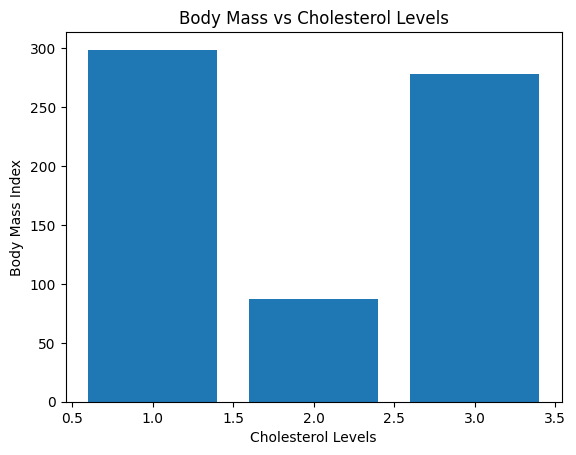

In [16]:
import matplotlib.pyplot as plt

cholesterol_levels = data_df['cholesterol']
bmi_values = data_df['bmi']

bars = plt.bar(cholesterol_levels, bmi_values, label="bmi")
plt.xlabel('Cholesterol Levels')
plt.ylabel('Body Mass Index')
plt.title("Body Mass vs Cholesterol Levels")

plt.show()

Hypothesis for gender: Male usually are taller and weights  more than Female. Thus, assumption is that Gender(1=F, 0=M)
Cholestrol level: 1=LOW, 2=MEDIUM, 3=HIGH

FINDINGS
The relationship between BMI (Body Mass Index) and cholesterol levels can vary based on various factors including genetics, diet, lifestyle, and overall health. While there's no direct correlation between BMI and cholesterol levels, it's possible for someone to have a high BMI but low cholesterol and vice versa.

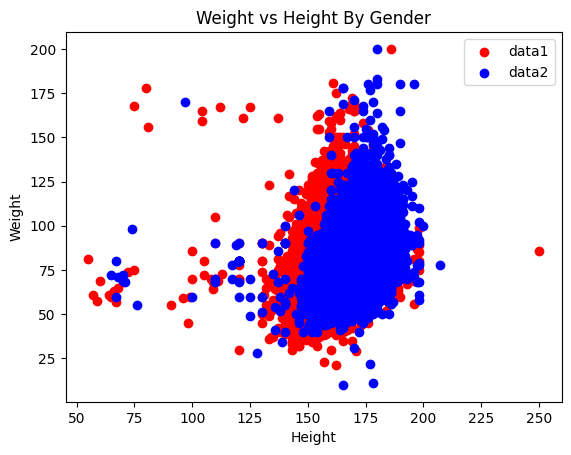

In [17]:
dataset1 = data_df[data_df['gender'] == 1]
dataset2 = data_df[data_df['gender'] == 2]

#Plotting
plt.scatter(dataset1['height'], dataset1['weight'], color='red', label='data1')
plt.scatter(dataset2['height'], dataset2['weight'], color='blue', label='data2')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight vs Height By Gender')

plt.legend()
plt.show()

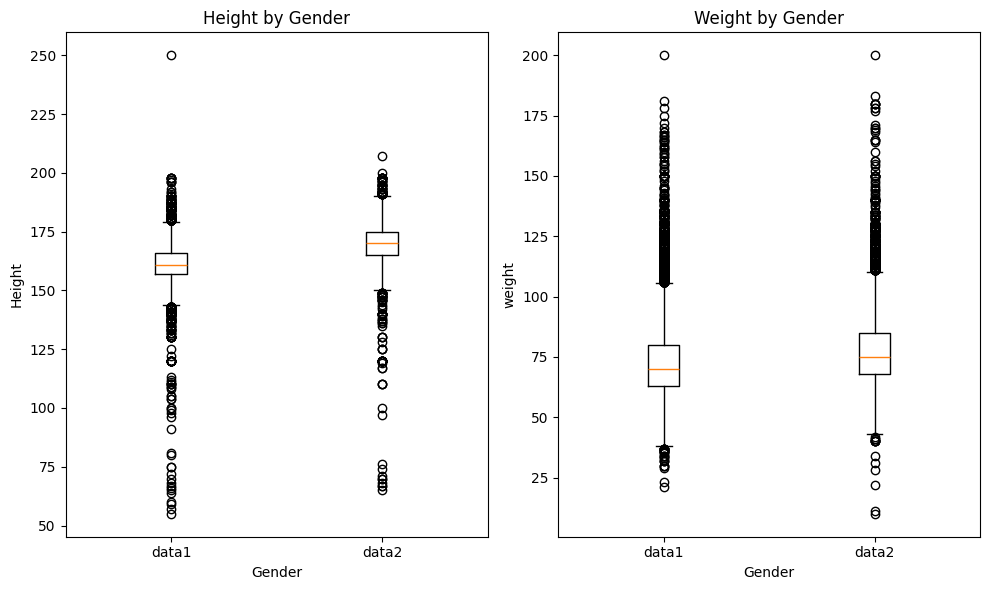

In [18]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.boxplot([data_df[data_df['gender'] == 1]['height'], data_df[data_df['gender'] == 2]['height']], labels=['data1','data2'])
plt.xlabel('Gender')
plt.ylabel('Height')
plt.title("Height by Gender")

plt.subplot(1, 2, 2)
plt.boxplot([data_df[data_df['gender'] == 1]['weight'], data_df[data_df['gender'] == 2]['weight']], labels=['data1','data2'])
plt.xlabel('Gender')
plt.ylabel('weight')
plt.title("Weight by Gender")

plt.tight_layout()
plt.show()

To the fact that typically Males are heavier and taller than Females.Thus 'data1' is deemed to be females and 'data2' is males.

Another point is, there are many outliers shown above. That may result positive or negative impact to the ML model which shall be addressed later.

In [62]:
#define the gender
data_df['gender_male'] = 0
data_df['gender_female'] = 0

data_df.loc[data_df['gender'] == 1, 'gender_female'] = 1
data_df.loc[data_df['gender'] == 2, 'gender_male'] = 1

data_df.drop(columns=['gender'], inplace=True)


In [63]:
#define the cholesterol leves
data_df['cholesterol_high'] = 0
data_df['cholesterol_medium'] = 0
data_df['cholesterol_low'] = 0

data_df.loc[data_df['cholesterol'] == 1, 'cholesterol_low'] = 1
data_df.loc[data_df['cholesterol'] == 2, 'cholesterol_medium'] = 1
data_df.loc[data_df['cholesterol'] == 3, 'cholesterol_high'] = 1

data_df.drop(columns=['cholesterol'], inplace=True)



In [65]:
#define the gluc leves
data_df['gluc_high'] = 0
data_df['gluc_medium'] = 0
data_df['gluc_low'] = 0

data_df.loc[data_df['gluc'] == 1, 'gluc_low'] = 1
data_df.loc[data_df['gluc'] == 2, 'gluc_medium'] = 1
data_df.loc[data_df['gluc'] == 3, 'gluc_high'] = 1

data_df.drop(columns=['gluc'], inplace=True)


In [ ]:
data_df.country.unique()

In [37]:
country_mapping_dict = {'Indonesia': 0, 
                        'Malaysia': 1,
                        'Singapore' : 2,
                        'India' : 3}

# Map values in columnA using the mapping dictionary
data_df['country_num'] = data_df['country'].map(country_mapping_dict)

data_df[['country', 'country_num']].drop_duplicates()

,country,country_num
0,Indonesia,0
1,Malaysia,1
3,Singapore,2
8,India,3


In [40]:
data_df.drop(columns=['country'], inplace=True)

In [38]:
data_df.max()

date                  2023-01-01 00:00:00
country                         Singapore
id                                  99999
active                                  1
alco                                    1
ap_hi                               16020
ap_lo                               11000
cholesterol                             3
gender                                  2
gluc                                    3
height                                250
occupation                        Teacher
smoke                                   1
weight                              200.0
disease                                 1
age_years                              64
bmi                            298.666667
gender_male                             1
gender_female                           1
cholesterol_high                        1
cholesterol_medium                      1
cholesterol_low                         1
country_num                             3
dtype: object

In [50]:
data_df.occupation.unique()

occupation_mapping_dict = {'Architect' : 0, 
                           'Accountant' : 1,
                           'Chef' : 2, 
                           'Lawyer' : 3, 
                           'Teacher' : 4, 
                           'Nurse' : 5,
                           'Engineer' : 6, 
                           'Doctor' : 7, 
                           'Others' : 8}

# Map values in columnA using the mapping dictionary
data_df['occupation_num'] = data_df['occupation'].map(occupation_mapping_dict)

data_df[['occupation', 'occupation_num']].drop_duplicates()



,occupation,occupation_num
0,Architect,0
1,Accountant,1
2,Chef,2
3,Lawyer,3
5,Teacher,4
13,Nurse,5
15,Engineer,6
20,Doctor,7
22,Others,8


In [51]:
data_df.drop(columns=['occupation'], inplace=True)

In [66]:
#data_df['gluc'].unique()

data_df.corr()

,date,id,active,alco,ap_hi,ap_lo,height,smoke,weight,disease,...,gender_male,gender_female,cholesterol_high,cholesterol_medium,cholesterol_low,country_num,occupation_num,gluc_high,gluc_medium,gluc_low
date,1.000000,-0.001225,0.000678,0.008741,0.002549,0.002816,0.000116,0.004024,-0.001464,-0.002015,...,0.002018,-0.002018,-0.003266,0.004210,-0.000926,-0.003885,0.004407,-0.008688,0.003230,0.004080
id,-0.001225,1.000000,0.003755,0.001210,0.003356,-0.002529,-0.003038,-0.003699,-0.001830,0.003799,...,0.003502,-0.003502,0.005819,0.001275,-0.005290,0.001960,0.000910,0.001490,0.002370,-0.002844
active,0.000678,0.003755,1.000000,0.025476,-0.000033,0.004780,-0.006570,0.025858,-0.016867,-0.035653,...,0.005866,-0.005866,0.013081,-0.004695,-0.005911,-0.001662,-0.001038,-0.002397,-0.009932,0.009061
alco,0.008741,0.001210,0.025476,1.000000,0.001408,0.010601,0.094419,0.340094,0.067113,-0.007330,...,0.170966,-0.170966,0.016915,0.039402,-0.043610,0.001951,-0.000058,-0.003499,0.031648,-0.020606
ap_hi,0.002549,0.003356,-0.000033,0.001408,1.000000,0.016086,0.005488,-0.000922,0.030702,0.054475,...,0.006005,-0.006005,0.017047,0.015409,-0.024730,-0.002726,-0.003910,0.008185,0.009289,-0.012886
ap_lo,0.002816,-0.002529,0.004780,0.010601,0.016086,1.000000,0.006150,0.005186,0.043710,0.065719,...,0.015254,-0.015254,0.015150,0.019417,-0.026504,0.002729,-0.004970,0.004792,0.013900,-0.013747
height,0.000116,-0.003038,-0.006570,0.094419,0.005488,0.006150,1.000000,0.187989,0.290968,-0.010821,...,0.499033,-0.499033,-0.041043,-0.023180,0.048532,-0.001730,0.001760,-0.013980,-0.012309,0.019400
smoke,0.004024,-0.003699,0.025858,0.340094,-0.000922,0.005186,0.187989,1.000000,0.067780,-0.015486,...,0.338135,-0.338135,-0.002185,0.024587,-0.017839,0.003871,0.000038,-0.013074,0.016082,-0.002087
weight,-0.001464,-0.001830,-0.016867,0.067113,0.030702,0.043710,0.290968,0.067780,1.000000,0.181660,...,0.155406,-0.155406,0.114499,0.067939,-0.137981,0.001012,-0.003489,0.068318,0.095067,-0.120407
disease,-0.002015,0.003799,-0.035653,-0.007330,0.054475,0.065719,-0.010821,-0.015486,0.181660,1.000000,...,0.008109,-0.008109,0.191798,0.081442,-0.205536,-0.000985,-0.003521,0.070241,0.052841,-0.090876


Text(0.5, 1.0, 'Correlation Heatmap')

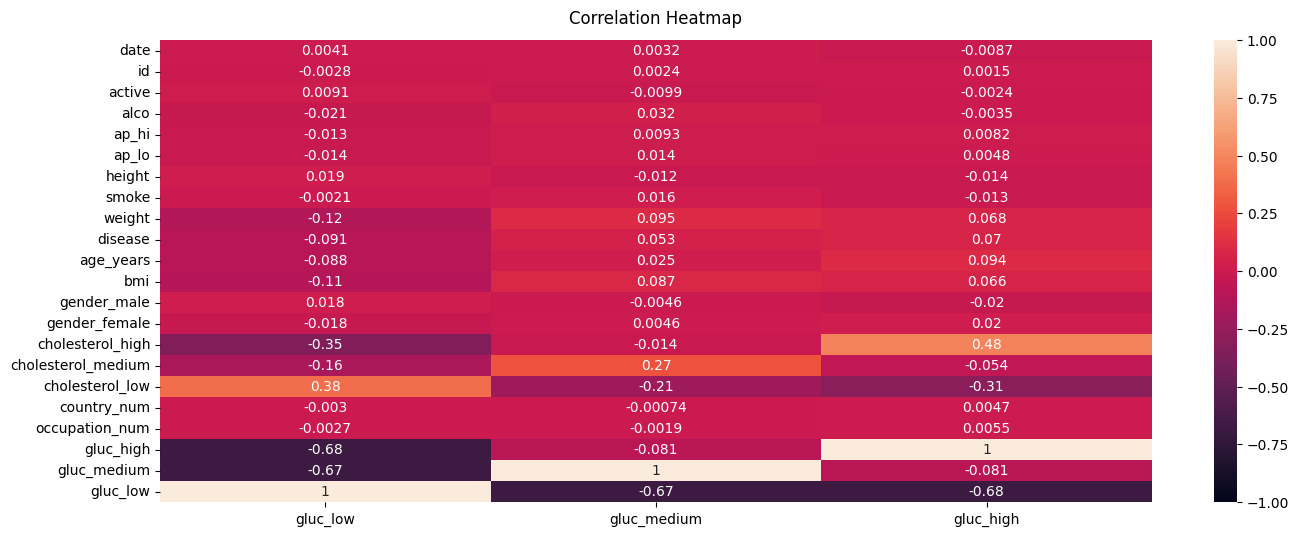

In [67]:
import seaborn as sns

plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(data_df.corr()[['gluc_low', 'gluc_medium', 'gluc_high']],
                      vmin=-1, vmax=1,
                      annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


In [68]:
data_df

,date,id,active,alco,ap_hi,ap_lo,height,smoke,weight,disease,...,gender_male,gender_female,cholesterol_high,cholesterol_medium,cholesterol_low,country_num,occupation_num,gluc_high,gluc_medium,gluc_low
0,2021-05-03,0,1,0,110,80,168,0,62.0,0,...,1,0,0,0,1,0,0,0,0,1
1,2021-08-05,1,1,0,140,90,156,0,85.0,1,...,0,1,1,0,0,1,1,0,0,1
2,2022-11-13,2,0,0,130,70,165,0,64.0,1,...,0,1,1,0,0,0,2,0,0,1
3,2018-10-31,3,1,0,150,100,169,0,82.0,1,...,1,0,0,0,1,2,3,0,0,1
4,2020-09-25,4,0,0,100,60,156,0,56.0,0,...,0,1,0,0,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2018-04-03,99993,1,0,120,80,168,1,76.0,0,...,1,0,0,0,1,2,7,0,0,1
69996,2022-01-12,99995,1,0,140,90,158,0,126.0,1,...,0,1,0,1,0,1,1,0,1,0
69997,2022-08-25,99996,0,1,180,90,183,0,105.0,1,...,1,0,1,0,0,1,1,0,0,1
69998,2020-07-13,99998,0,0,135,80,163,0,72.0,1,...,0,1,0,0,1,2,1,0,1,0


In [25]:
#data_df[data_df['bmi'] > 200]

,date,country,id,active,alco,ap_hi,ap_lo,cholesterol,gender,gluc,...,smoke,weight,disease,age_years,bmi,gender_male,gender_female,cholesterol_high,cholesterol_medium,cholesterol_low
12770,28-02-2021,Malaysia,18218,1,0,120,80,1,1,1,...,1,168.0,1,53,298.666667,0,1,0,0,1
22723,22-11-2021,India,32456,1,0,130,90,1,1,1,...,0,81.0,1,64,267.768595,0,1,0,0,1
23913,20-08-2018,Singapore,34186,1,0,140,90,1,1,1,...,0,156.0,0,52,237.768633,0,1,0,0,1
27384,19-10-2018,India,39156,1,0,140,90,3,1,3,...,0,178.0,1,41,278.125000,0,1,1,0,0
